# Model Robustness

**Objectives**
- Load the Model(s)
- Run predictions on the model using the Holdout/Test Datasplit (better if the malicious samples are verified for malware types)
- Record instances where the model failed to predict correctly
- Record the performance of the models (e.g., Accuracy, Precision, Recall, ROC-AUC, etc.)

In [57]:
import pandas as pd
import numpy as np

import lightgbm as lgbm
import catboost as catb

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, average_precision_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay

from joblib import load
import warnings
warnings.filterwarnings("ignore")

## 1. Determine the Model Performance in each of the GBDT Models and each of its two behavior-types.

`How does the model perform using 'real-world' data (i.e., Test/Holdout Split)?`

Run other metrics as well as you see fit that are not found in the classification_report and Confusion Matrix.

- Label column is `0/'malicious'`
- Feature column is `[:, 1:101]`

### 1.1 Defining a helper function for evaluation


In [58]:
def evaluate(model, test_set, y_actual):
    y_pred = model.predict(test_set)
    cm = confusion_matrix(y_actual, y_pred)
    print(classification_report(y_actual, y_pred, digits=4))
    print(f"AUC-ROC Score: {roc_auc_score(y_actual, y_pred):.4f}")
    print("ROC Curve & Confusion matrix:")
    RocCurveDisplay.from_predictions(y_actual, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    #print(classification_report(y_actual, y_pred, digits=4))
    

### 1.2 LightGBM

In [59]:
DF_LGBM_TB = pd.read_csv('./Dataset/M-LGBM_TB.csv', low_memory=False) #<== Point these to the proper Test/Holdout datasets.
DF_LGBM_IB = pd.read_csv('./Dataset/M-LGBM_IB.csv', low_memory=False)

display(DF_LGBM_TB.head())
print(DF_LGBM_TB['type'].unique())
display(DF_LGBM_IB.head())
print(DF_LGBM_IB['type'].unique())

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,106,266,216,293,121,194,113,260,159,...,217,20,40,178,114,244,298,86,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,106,216,293,121,194,260,159,286,10,...,301,171,187,174,217,110,20,40,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,50,198,39,71,215,194,131,171,35,...,227,119,18,185,257,156,289,99,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,106,266,202,293,194,162,260,286,46,...,114,298,86,274,91,2,256,39,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,50,198,39,71,215,194,131,171,35,...,110,20,114,86,2,256,139,73,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign


['benign' 'trojan' 'pua' 'downloader' 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,106,266,216,293,121,194,113,260,159,...,217,20,40,178,114,244,298,86,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,106,216,293,121,194,260,159,286,10,...,301,171,187,174,217,110,20,40,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,50,198,39,71,215,194,131,171,35,...,227,119,18,185,257,156,289,99,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,106,266,202,293,194,162,260,286,46,...,114,298,86,274,91,2,256,39,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,50,198,39,71,215,194,131,171,35,...,110,20,114,86,2,256,139,73,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign


['benign' 'trojan' 'pua' 'downloader' 'virus']


In [60]:
# Load trained LightGBM model files
default_tb = load('Models/LGBM/Default/RYZEN2b_LGBM_TB.model') # <== Point these to the respective .model files
default_ib = load('Models/LGBM/Default/RYZEN2b_LGBM_IB.model')
tuned_tb = load('Models/LGBM/Tuned/TUNED_RYZEN2b_LGBM_TB.model')
tuned_ib = load('Models/LGBM/Tuned/TUNED_RYZEN2b_LGBM_IB.model')

1. Default LGBM TB

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        85
           1     0.3411    1.0000    0.5087        44

    accuracy                         0.3411       129
   macro avg     0.1705    0.5000    0.2543       129
weighted avg     0.1163    0.3411    0.1735       129

AUC-ROC Score: 0.5000
ROC Curve & Confusion matrix:


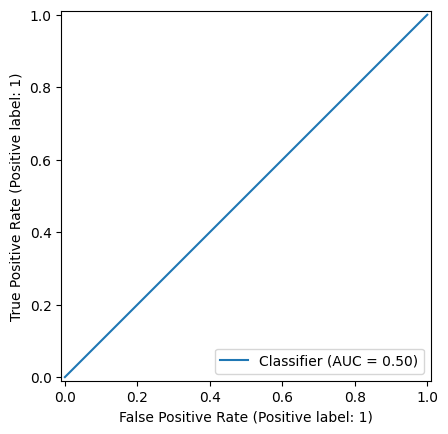

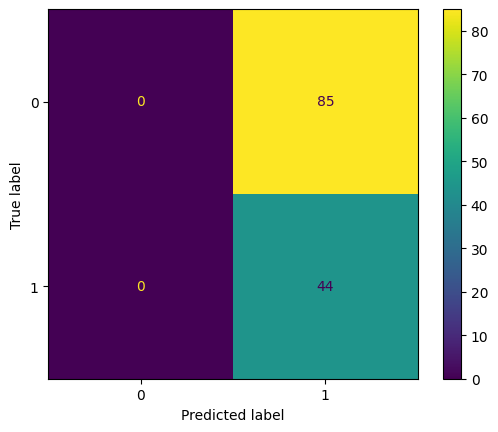

In [61]:
print("1. Default LGBM TB\n")
evaluate(default_tb, DF_LGBM_TB.iloc[:,1:101], DF_LGBM_TB.iloc[:,0])

2. Default LGBM IB

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        85
           1     0.3411    1.0000    0.5087        44

    accuracy                         0.3411       129
   macro avg     0.1705    0.5000    0.2543       129
weighted avg     0.1163    0.3411    0.1735       129

AUC-ROC Score: 0.5000
ROC Curve & Confusion matrix:


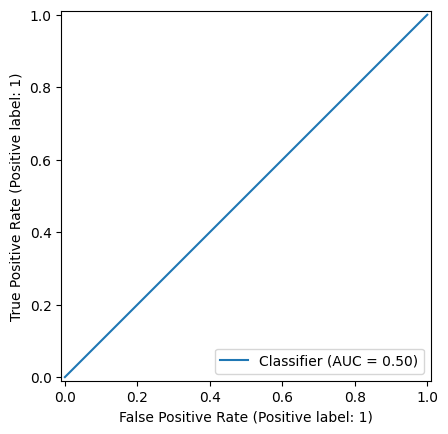

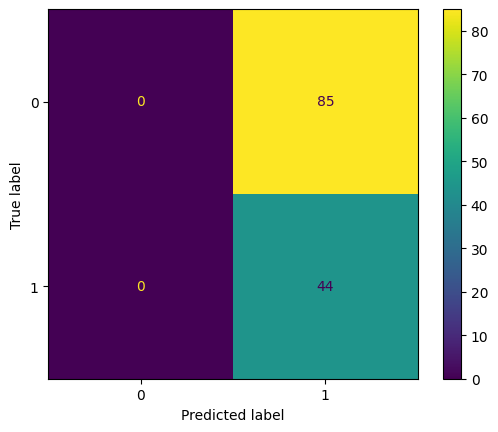

In [62]:
print("2. Default LGBM IB\n")
evaluate(default_ib, DF_LGBM_IB.iloc[:,1:101], DF_LGBM_IB.iloc[:,0])

3. Tuned LGBM TB

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        85
           1     0.3411    1.0000    0.5087        44

    accuracy                         0.3411       129
   macro avg     0.1705    0.5000    0.2543       129
weighted avg     0.1163    0.3411    0.1735       129

AUC-ROC Score: 0.5000
ROC Curve & Confusion matrix:


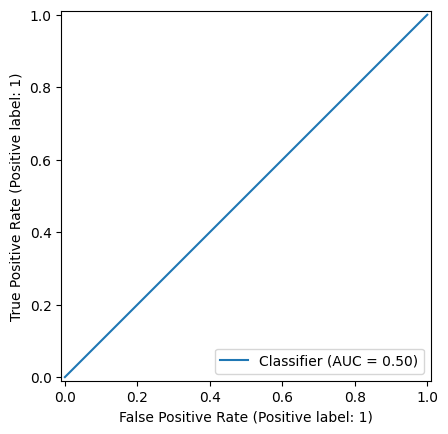

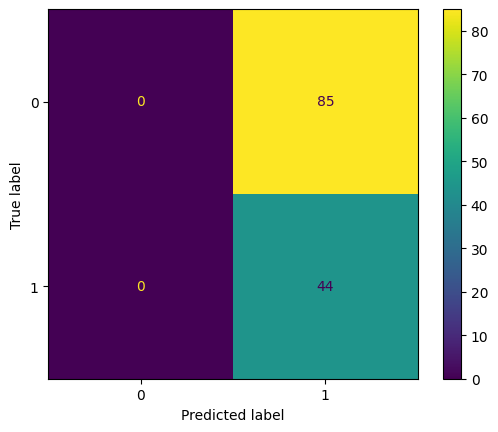

In [63]:
print("3. Tuned LGBM TB\n")
evaluate(tuned_tb, DF_LGBM_TB.iloc[:,1:101], DF_LGBM_TB.iloc[:,0])

4. Tuned LGBM IB

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        85
           1     0.3411    1.0000    0.5087        44

    accuracy                         0.3411       129
   macro avg     0.1705    0.5000    0.2543       129
weighted avg     0.1163    0.3411    0.1735       129

AUC-ROC Score: 0.5000
ROC Curve & Confusion matrix:


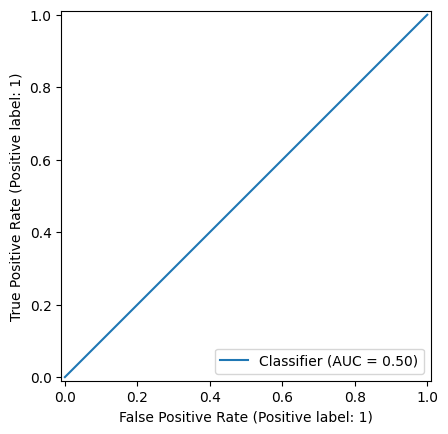

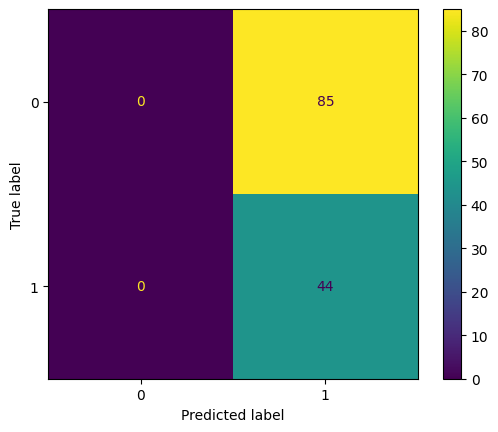

In [64]:
print("4. Tuned LGBM IB\n")
evaluate(tuned_ib, DF_LGBM_IB.iloc[:,1:101], DF_LGBM_IB.iloc[:,0])

### 1.3 CatBoost

In [65]:
DF_CATB_TB = pd.read_csv('./Dataset/M-CATB_TB.csv', low_memory=False) #<== Point these to the proper Test/Holdout datasets.
DF_CATB_IB = pd.read_csv('./Dataset/M-CATB_IB.csv', low_memory=False)

DF_CATB_IB.iloc[:,1:101] = DF_CATB_IB.iloc[:,1:101].astype('str')
DF_CATB_IB.replace("nan", "NaN", inplace=True)

#DF_CATB_TB = DF_CATB_TB[DF_CATB_TB['Type 1'] != '_']
#DF_CATB_IB = DF_CATB_IB[DF_CATB_IB['Type 1'] != '_']

display(DF_CATB_TB.head())
print(DF_CATB_TB['type'].unique())
display(DF_CATB_IB.head())
print(DF_CATB_IB['type'].unique())

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,NtOpenSection,GetForegroundWindow,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegEnumKeyExA,RegOpenKeyExW,NtDelayExecution,...,CertOpenStore,NtOpenFile,RegQueryInfoKeyW,NtUnmapViewOfSection,NtQueryDirectoryFile,Module32NextW,NtQueryAttributesFile,NtCreateMutant,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,NtOpenSection,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegOpenKeyExW,NtDelayExecution,SetErrorMode,GetFileInformationByHandle,...,CryptHashData,NtMapViewOfSection,NtFreeVirtualMemory,GetKeyState,CertOpenStore,OleInitialize,NtOpenFile,RegQueryInfoKeyW,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,SendNotifyMessageA,NtSetInformationFile,GetComputerNameW,GetComputerNameA,FindFirstFileExW,NtOpenMutant,RegDeleteKeyA,GetNativeSystemInfo,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,NtOpenSection,GetForegroundWindow,RegEnumKeyW,GetFileVersionInfoSizeW,GetFileAttributesW,GetVolumePathNamesForVolumeNameW,RegOpenKeyExW,SetErrorMode,ShellExecuteExW,...,NtQueryDirectoryFile,NtQueryAttributesFile,NtCreateMutant,NtOpenKey,OpenSCManagerW,FindResourceW,GetFileVersionInfoW,IsDebuggerPresent,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,OleInitialize,NtOpenFile,NtQueryDirectoryFile,NtCreateMutant,FindResourceW,GetFileVersionInfoW,GetUserNameExW,GetFileAttributesExW,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign


['benign' 'trojan' 'pua' 'downloader' 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,NtOpenSection,GetForegroundWindow,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegEnumKeyExA,RegOpenKeyExW,NtDelayExecution,...,CertOpenStore,NtOpenFile,RegQueryInfoKeyW,NtUnmapViewOfSection,NtQueryDirectoryFile,Module32NextW,NtQueryAttributesFile,NtCreateMutant,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,NtOpenSection,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegOpenKeyExW,NtDelayExecution,SetErrorMode,GetFileInformationByHandle,...,CryptHashData,NtMapViewOfSection,NtFreeVirtualMemory,GetKeyState,CertOpenStore,OleInitialize,NtOpenFile,RegQueryInfoKeyW,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,SendNotifyMessageA,NtSetInformationFile,GetComputerNameW,GetComputerNameA,FindFirstFileExW,NtOpenMutant,RegDeleteKeyA,GetNativeSystemInfo,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,NtOpenSection,GetForegroundWindow,RegEnumKeyW,GetFileVersionInfoSizeW,GetFileAttributesW,GetVolumePathNamesForVolumeNameW,RegOpenKeyExW,SetErrorMode,ShellExecuteExW,...,NtQueryDirectoryFile,NtQueryAttributesFile,NtCreateMutant,NtOpenKey,OpenSCManagerW,FindResourceW,GetFileVersionInfoW,IsDebuggerPresent,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,OleInitialize,NtOpenFile,NtQueryDirectoryFile,NtCreateMutant,FindResourceW,GetFileVersionInfoW,GetUserNameExW,GetFileAttributesExW,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign


['benign' 'trojan' 'pua' 'downloader' 'virus']


In [66]:
# Load trained CatBoost model files (CatBoost requires instantiation before being able to load a trianed model file).
default_tb = catb.CatBoostClassifier()
default_ib = catb.CatBoostClassifier()
tuned_tb = catb.CatBoostClassifier()
tuned_ib = catb.CatBoostClassifier()
default_tb = default_tb.load_model("Models/CATB/Default/RYZEN2b_CATB_TB.model", format='json') # <== Point these to the respective .model files
default_ib = default_ib.load_model("Models/CATB/Default/RYZEN2b_CATB_IB.model", format='json')
tuned_tb = tuned_tb.load_model("Models/CATB/Tuned/TUNED_RYZEN2b_CATB_TB.model", format='json')
tuned_ib = tuned_ib.load_model("Models/CATB/Tuned/TUNED_RYZEN2b_CATB_IB.model", format='json')

1. Default CatBoost TB

              precision    recall  f1-score   support

           0     0.6667    0.0235    0.0455        85
           1     0.3413    0.9773    0.5059        44

    accuracy                         0.3488       129
   macro avg     0.5040    0.5004    0.2757       129
weighted avg     0.5557    0.3488    0.2025       129

AUC-ROC Score: 0.5004
ROC Curve & Confusion matrix:


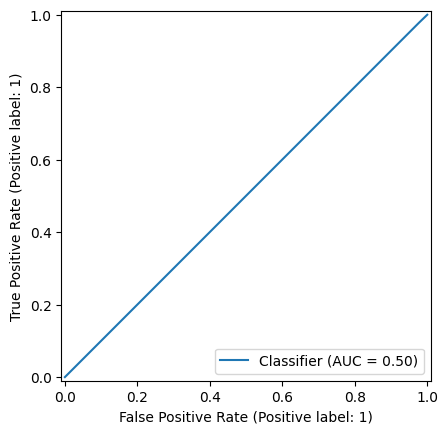

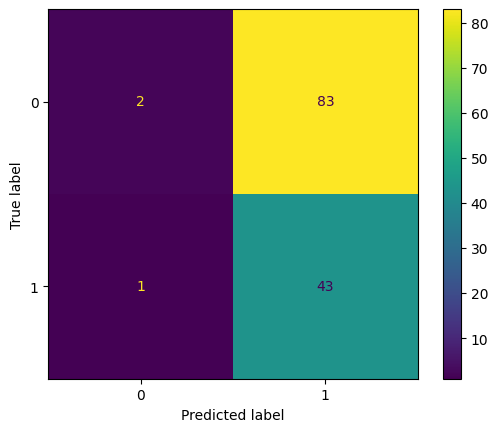

In [67]:
print("1. Default CatBoost TB\n")
evaluate(default_tb, DF_CATB_TB.iloc[:,1:101], DF_CATB_TB.iloc[:,0])

2. Default CatBoost IB

              precision    recall  f1-score   support

           0     1.0000    0.0471    0.0899        85
           1     0.3520    1.0000    0.5207        44

    accuracy                         0.3721       129
   macro avg     0.6760    0.5235    0.3053       129
weighted avg     0.7790    0.3721    0.2368       129

AUC-ROC Score: 0.5235
ROC Curve & Confusion matrix:


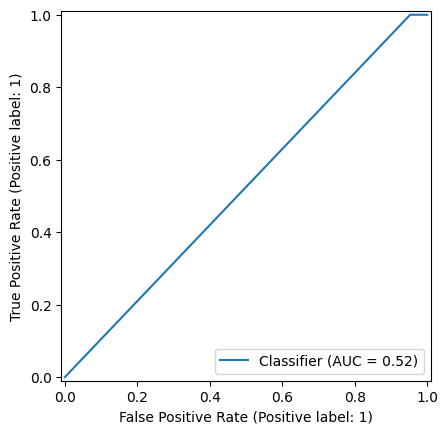

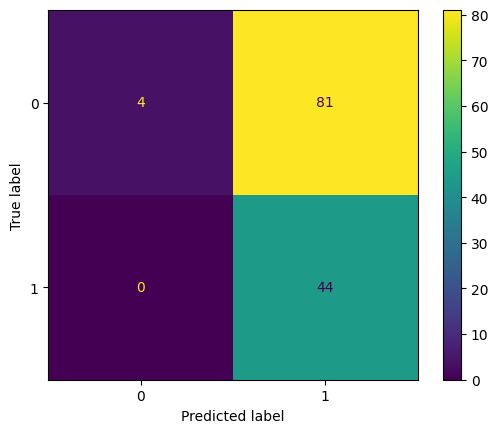

In [68]:
print("2. Default CatBoost IB\n")
evaluate(default_ib, DF_CATB_IB.iloc[:,1:101], DF_CATB_IB.iloc[:,0])

3. Tuned CatBoost TB

              precision    recall  f1-score   support

           0     1.0000    0.0235    0.0460        85
           1     0.3465    1.0000    0.5146        44

    accuracy                         0.3566       129
   macro avg     0.6732    0.5118    0.2803       129
weighted avg     0.7771    0.3566    0.2058       129

AUC-ROC Score: 0.5118
ROC Curve & Confusion matrix:


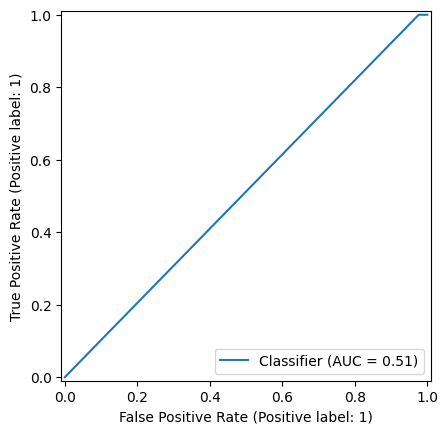

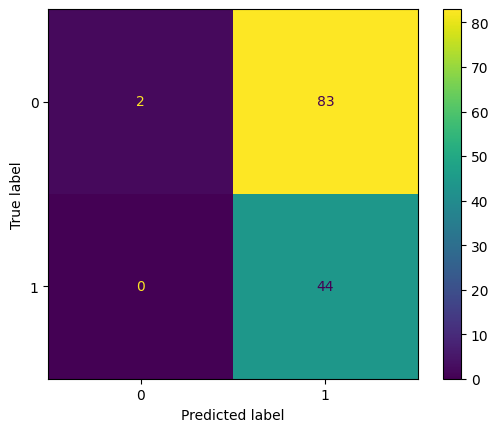

In [69]:
print("3. Tuned CatBoost TB\n")
evaluate(tuned_tb, DF_CATB_TB.iloc[:,1:101], DF_CATB_TB.iloc[:,0])

4. Tuned CatBoost IB

              precision    recall  f1-score   support

           0     1.0000    0.0118    0.0233        85
           1     0.3438    1.0000    0.5116        44

    accuracy                         0.3488       129
   macro avg     0.6719    0.5059    0.2674       129
weighted avg     0.7762    0.3488    0.1898       129

AUC-ROC Score: 0.5059
ROC Curve & Confusion matrix:


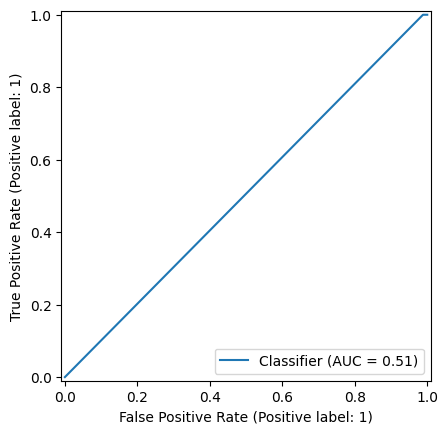

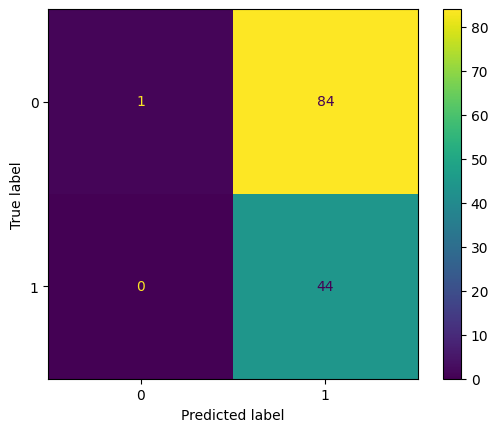

In [70]:
print("4. Tuned CatBoost IB\n")
evaluate(tuned_ib, DF_CATB_IB.iloc[:,1:101], DF_CATB_IB.iloc[:,0])

## 2. Check for model capabilities at a malware type level in each GBDT Models and each of its two behavior-types.

Using the `xx` dataset, determine the prediction capability of the model in each malware type.

**Answer this question:**

`How good are the model (as per classification report and confusion matrix) on a per-malware type basis?`

The theory is that malware-types that are prominent in terms of quantity might be detected accurately as malware than those that are not. 

### 2.1 Defining a helper function

In [71]:
def evaluate_per_type(model, test_set, mal_type):
    filtered_set = test_set.loc[(test_set['type'] == 'benign') | (test_set['type'] == mal_type)]
    y_pred = model.predict(filtered_set.iloc[:,1:101])
    acc = accuracy_score(filtered_set.iloc[:,0], y_pred)
    prec = precision_score(filtered_set.iloc[:,0], y_pred)
    rec = recall_score(filtered_set.iloc[:,0], y_pred)
    auc_roc = roc_auc_score(filtered_set.iloc[:,0], y_pred)
    f1 = f1_score(filtered_set.iloc[:,0], y_pred)
    cm = confusion_matrix(filtered_set.iloc[:,0], y_pred)
    print("Malware Type: " + mal_type)
    print("==========================")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc_roc:.4f}")
    print(f"TN: {cm[0,0]:4d} FN: {cm[1,0]:4d}")
    print(f"TP: {cm[1,1]:4d} FP: {cm[0,1]:4d}")
    print("")

### 2.1 LightGBM

In [72]:
#Load Verified Test/Holodut Dataset
DF_LGBM_TB = pd.read_csv('././Dataset/M-LGBM_TB.csv', low_memory=False)
DF_LGBM_IB = pd.read_csv('././Dataset/M-LGBM_IB.csv', low_memory=False)

# No need to drop these "_" muna, assume na walang false-labelled malicious samples (pa-comment out nalang muna).
# DF_LGBM_TB = DF_LGBM_TB[DF_LGBM_TB['type'] != '_']
# DF_LGBM_IB = DF_LGBM_IB[DF_LGBM_IB['type'] != '_']
DF_LGBM_TB = DF_LGBM_TB.dropna()
DF_LGBM_IB = DF_LGBM_IB.dropna()

#Models
default_tb = load('./Models/LGBM/Default/RYZEN2b_LGBM_TB.model')
default_ib = load('./Models/LGBM/Default/RYZEN2b_LGBM_IB.model')
tuned_tb = load('./Models/LGBM/Tuned/TUNED_RYZEN2b_LGBM_TB.model')
tuned_ib = load('./Models/LGBM/Tuned/TUNED_RYZEN2b_LGBM_IB.model')

display(DF_LGBM_TB)
print("DF_LGBM_TB:", DF_LGBM_TB['type'].unique().tolist())
display(DF_LGBM_IB)
print("DF_LGBM_IB:", DF_LGBM_IB['type'].unique().tolist())

'''
COLUMNS:
Features = [:, 1:101]
Label = [:, 0]
Hash = [:, 101]
Type 1 (malware type) = [:, 102]
'''

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,106,266,216,293,121,194,113,260,159,...,217,20,40,178,114,244,298,86,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,106,216,293,121,194,260,159,286,10,...,301,171,187,174,217,110,20,40,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,50,198,39,71,215,194,131,171,35,...,227,119,18,185,257,156,289,99,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,106,266,202,293,194,162,260,286,46,...,114,298,86,274,91,2,256,39,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,50,198,39,71,215,194,131,171,35,...,110,20,114,86,2,256,139,73,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,139,106,266,216,202,184,293,121,194,...,113,148,226,135,130,14,19,30,ef1c69dfe182587ff715be5bdcc2be90ed6ef81fa56b8e...,virus
125,1,139,106,266,284,180,184,121,194,26,...,187,174,110,20,40,199,178,306,ee029f7c10d1da187bfd82d7852460ba7808060e855b9c...,virus
126,1,139,106,284,216,121,194,113,260,159,...,19,93,231,289,89,75,91,198,ee25bc47914cfb5064288f65c9ec5fec94853ac8b871e2...,trojan
127,1,139,99,106,214,65,89,198,108,114,...,11,5,118,85,148,72,226,30,ede1428f8e6ec8fcf886b3cbfcca9094f26bdc96cc9c1b...,trojan


DF_LGBM_TB: ['benign', 'trojan', 'pua', 'downloader', 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,106,266,216,293,121,194,113,260,159,...,217,20,40,178,114,244,298,86,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,106,216,293,121,194,260,159,286,10,...,301,171,187,174,217,110,20,40,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,50,198,39,71,215,194,131,171,35,...,227,119,18,185,257,156,289,99,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,106,266,202,293,194,162,260,286,46,...,114,298,86,274,91,2,256,39,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,50,198,39,71,215,194,131,171,35,...,110,20,114,86,2,256,139,73,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,139,106,266,216,202,184,293,121,194,...,113,148,226,135,130,14,19,30,ef1c69dfe182587ff715be5bdcc2be90ed6ef81fa56b8e...,virus
125,1,139,106,266,284,180,184,121,194,26,...,187,174,110,20,40,199,178,306,ee029f7c10d1da187bfd82d7852460ba7808060e855b9c...,virus
126,1,139,106,284,216,121,194,113,260,159,...,19,93,231,289,89,75,91,198,ee25bc47914cfb5064288f65c9ec5fec94853ac8b871e2...,trojan
127,1,139,99,106,214,65,89,198,108,114,...,11,5,118,85,148,72,226,30,ede1428f8e6ec8fcf886b3cbfcca9094f26bdc96cc9c1b...,trojan


DF_LGBM_IB: ['benign', 'trojan', 'pua', 'downloader', 'virus']


'\nCOLUMNS:\nFeatures = [:, 1:101]\nLabel = [:, 0]\nHash = [:, 101]\nType 1 (malware type) = [:, 102]\n'

In [73]:
print("1. Default LGBM TB\n")
for mal_type in DF_LGBM_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_tb, DF_LGBM_TB, mal_type)

1. Default LGBM TB

Malware Type: trojan
Accuracy:  0.3033
Precision: 0.3033
Recall:    1.0000
F1 Score:  0.4654
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:   37 FP:   85

Malware Type: pua
Accuracy:  0.0116
Precision: 0.0116
Recall:    1.0000
F1 Score:  0.0230
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    1 FP:   85

Malware Type: downloader
Accuracy:  0.0230
Precision: 0.0230
Recall:    1.0000
F1 Score:  0.0449
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    2 FP:   85

Malware Type: virus
Accuracy:  0.0449
Precision: 0.0449
Recall:    1.0000
F1 Score:  0.0860
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    4 FP:   85



In [74]:
print("2. Default LGBM IB\n")
for mal_type in DF_LGBM_IB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_ib, DF_LGBM_IB, mal_type)

2. Default LGBM IB

Malware Type: trojan
Accuracy:  0.3033
Precision: 0.3033
Recall:    1.0000
F1 Score:  0.4654
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:   37 FP:   85

Malware Type: pua
Accuracy:  0.0116
Precision: 0.0116
Recall:    1.0000
F1 Score:  0.0230
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    1 FP:   85

Malware Type: downloader
Accuracy:  0.0230
Precision: 0.0230
Recall:    1.0000
F1 Score:  0.0449
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    2 FP:   85

Malware Type: virus
Accuracy:  0.0449
Precision: 0.0449
Recall:    1.0000
F1 Score:  0.0860
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    4 FP:   85



In [75]:
print("3. Tuned LGBM TB\n")
for mal_type in DF_LGBM_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_tb, DF_LGBM_TB, mal_type)

3. Tuned LGBM TB

Malware Type: trojan
Accuracy:  0.3033
Precision: 0.3033
Recall:    1.0000
F1 Score:  0.4654
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:   37 FP:   85

Malware Type: pua
Accuracy:  0.0116
Precision: 0.0116
Recall:    1.0000
F1 Score:  0.0230
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    1 FP:   85

Malware Type: downloader
Accuracy:  0.0230
Precision: 0.0230
Recall:    1.0000
F1 Score:  0.0449
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    2 FP:   85

Malware Type: virus
Accuracy:  0.0449
Precision: 0.0449
Recall:    1.0000
F1 Score:  0.0860
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    4 FP:   85



In [76]:
print("4. Tuned LGBM IB\n")
for mal_type in DF_LGBM_IB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_ib, DF_LGBM_IB, mal_type)

4. Tuned LGBM IB

Malware Type: trojan
Accuracy:  0.3033
Precision: 0.3033
Recall:    1.0000
F1 Score:  0.4654
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:   37 FP:   85

Malware Type: pua
Accuracy:  0.0116
Precision: 0.0116
Recall:    1.0000
F1 Score:  0.0230
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    1 FP:   85



Malware Type: downloader
Accuracy:  0.0230
Precision: 0.0230
Recall:    1.0000
F1 Score:  0.0449
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    2 FP:   85

Malware Type: virus
Accuracy:  0.0449
Precision: 0.0449
Recall:    1.0000
F1 Score:  0.0860
AUC-ROC:   0.5000
TN:    0 FN:    0
TP:    4 FP:   85



### 2.2 CatBoost

In [77]:
#Load Verified Test/Holdout Dataset
DF_CATB_TB = pd.read_csv('././Dataset/M-CATB_TB.csv', low_memory=False)
DF_CATB_IB = pd.read_csv('././Dataset/M-CATB_IB.csv', low_memory=False)

# DF_CATB_TB = DF_CATB_TB[DF_CATB_TB['type'] != '_']
# DF_CATB_IB = DF_CATB_IB[DF_CATB_IB['type'] != '_']
DF_CATB_TB = DF_CATB_TB.dropna()
DF_CATB_IB = DF_CATB_IB.dropna(subset=['type']) # Drops na only on type column
DF_CATB_IB.iloc[:,1:101] = DF_CATB_IB.iloc[:,1:101].astype('str')
DF_CATB_IB.replace("nan", "NaN", inplace=True)

default_tb = catb.CatBoostClassifier()
default_ib = catb.CatBoostClassifier()
tuned_tb = catb.CatBoostClassifier()
tuned_ib = catb.CatBoostClassifier()
default_tb = default_tb.load_model("./Models/CATB/Default/RYZEN2b_CATB_TB.model", format='json')
default_ib = default_ib.load_model("./Models/CATB/Default/RYZEN2b_CATB_IB.model", format='json')
tuned_tb = tuned_tb.load_model("./Models/CATB/Tuned/TUNED_RYZEN2b_CATB_TB.model", format='json')
tuned_ib = tuned_ib.load_model("./Models/CATB/Tuned/TUNED_RYZEN2b_CATB_IB.model", format='json')

display(DF_CATB_TB)
print("DF_CATB_TB:", DF_CATB_TB['type'].unique().tolist())
display(DF_CATB_IB)
print("DF_CATB_IB:", DF_CATB_IB['type'].unique().tolist())

'''
COLUMNS:
Features = [:, 1:101]
Label = [:, 0]
Hash = [:, 101]
Type 1 (malware type) = [:, 102]
'''

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,NtOpenSection,GetForegroundWindow,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegEnumKeyExA,RegOpenKeyExW,NtDelayExecution,...,CertOpenStore,NtOpenFile,RegQueryInfoKeyW,NtUnmapViewOfSection,NtQueryDirectoryFile,Module32NextW,NtQueryAttributesFile,NtCreateMutant,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,NtOpenSection,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegOpenKeyExW,NtDelayExecution,SetErrorMode,GetFileInformationByHandle,...,CryptHashData,NtMapViewOfSection,NtFreeVirtualMemory,GetKeyState,CertOpenStore,OleInitialize,NtOpenFile,RegQueryInfoKeyW,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,SendNotifyMessageA,NtSetInformationFile,GetComputerNameW,GetComputerNameA,FindFirstFileExW,NtOpenMutant,RegDeleteKeyA,GetNativeSystemInfo,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,NtOpenSection,GetForegroundWindow,RegEnumKeyW,GetFileVersionInfoSizeW,GetFileAttributesW,GetVolumePathNamesForVolumeNameW,RegOpenKeyExW,SetErrorMode,ShellExecuteExW,...,NtQueryDirectoryFile,NtQueryAttributesFile,NtCreateMutant,NtOpenKey,OpenSCManagerW,FindResourceW,GetFileVersionInfoW,IsDebuggerPresent,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,OleInitialize,NtOpenFile,NtQueryDirectoryFile,NtCreateMutant,FindResourceW,GetFileVersionInfoW,GetUserNameExW,GetFileAttributesExW,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,GetUserNameExW,NtOpenSection,GetForegroundWindow,WSARecv,RegEnumKeyW,GetUserNameExA,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,...,RegEnumKeyExA,closesocket,RegEnumValueW,NtCreateSection,GetKeyboardState,RegSetValueExW,RegEnumValueA,InternetOpenW,ef1c69dfe182587ff715be5bdcc2be90ed6ef81fa56b8e...,virus
125,1,GetUserNameExW,NtOpenSection,GetForegroundWindow,NtSetValueKey,CreateJobObjectW,GetUserNameExA,GetAdaptersAddresses,GetFileAttributesW,SetInformationJobObject,...,NtFreeVirtualMemory,GetKeyState,OleInitialize,NtOpenFile,RegQueryInfoKeyW,SetFilePointer,NtUnmapViewOfSection,__exception__,ee029f7c10d1da187bfd82d7852460ba7808060e855b9c...,virus
126,1,GetUserNameExW,NtOpenSection,NtSetValueKey,WSARecv,GetAdaptersAddresses,GetFileAttributesW,RegEnumKeyExA,RegOpenKeyExW,NtDelayExecution,...,RegEnumValueA,GetFileType,WSASocketW,RegDeleteKeyA,NtDuplicateObject,getsockname,OpenSCManagerW,GetSystemInfo,ee25bc47914cfb5064288f65c9ec5fec94853ac8b871e2...,trojan
127,1,GetUserNameExW,GetNativeSystemInfo,NtOpenSection,CoUninitialize,RegCloseKey,NtDuplicateObject,GetSystemInfo,WSAStartup,NtQueryDirectoryFile,...,CryptAcquireContextW,MessageBoxTimeoutW,GlobalMemoryStatus,GetSystemDirectoryA,closesocket,GlobalMemoryStatusEx,RegEnumValueW,InternetOpenW,ede1428f8e6ec8fcf886b3cbfcca9094f26bdc96cc9c1b...,trojan


DF_CATB_TB: ['benign', 'trojan', 'pua', 'downloader', 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,0,NtOpenSection,GetForegroundWindow,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegEnumKeyExA,RegOpenKeyExW,NtDelayExecution,...,CertOpenStore,NtOpenFile,RegQueryInfoKeyW,NtUnmapViewOfSection,NtQueryDirectoryFile,Module32NextW,NtQueryAttributesFile,NtCreateMutant,981e9aa47cd71566d471cbb87c6287dbe51c637401596a...,benign
1,0,NtOpenSection,WSARecv,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,RegOpenKeyExW,NtDelayExecution,SetErrorMode,GetFileInformationByHandle,...,CryptHashData,NtMapViewOfSection,NtFreeVirtualMemory,GetKeyState,CertOpenStore,OleInitialize,NtOpenFile,RegQueryInfoKeyW,ff35c0bed9b61b5fae1f28bec8acb10916a8605c95c778...,benign
2,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,SendNotifyMessageA,NtSetInformationFile,GetComputerNameW,GetComputerNameA,FindFirstFileExW,NtOpenMutant,RegDeleteKeyA,GetNativeSystemInfo,faf544452a8efd3d1cf2456ced8d9529e33f414ef1fca0...,benign
3,0,NtOpenSection,GetForegroundWindow,RegEnumKeyW,GetFileVersionInfoSizeW,GetFileAttributesW,GetVolumePathNamesForVolumeNameW,RegOpenKeyExW,SetErrorMode,ShellExecuteExW,...,NtQueryDirectoryFile,NtQueryAttributesFile,NtCreateMutant,NtOpenKey,OpenSCManagerW,FindResourceW,GetFileVersionInfoW,IsDebuggerPresent,e3495f53563d473aeec5c7a03ec5bbe32cc7ff278352fe...,benign
4,0,LdrUnloadDll,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileAttributesW,RemoveDirectoryA,NtMapViewOfSection,GetSystemMetrics,...,OleInitialize,NtOpenFile,NtQueryDirectoryFile,NtCreateMutant,FindResourceW,GetFileVersionInfoW,GetUserNameExW,GetFileAttributesExW,7ef3316642fa9506ccb7df599aa5b107ad45929bf45abc...,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,GetUserNameExW,NtOpenSection,GetForegroundWindow,WSARecv,RegEnumKeyW,GetUserNameExA,GetFileVersionInfoSizeW,GetAdaptersAddresses,GetFileAttributesW,...,RegEnumKeyExA,closesocket,RegEnumValueW,NtCreateSection,GetKeyboardState,RegSetValueExW,RegEnumValueA,InternetOpenW,ef1c69dfe182587ff715be5bdcc2be90ed6ef81fa56b8e...,virus
125,1,GetUserNameExW,NtOpenSection,GetForegroundWindow,NtSetValueKey,CreateJobObjectW,GetUserNameExA,GetAdaptersAddresses,GetFileAttributesW,SetInformationJobObject,...,NtFreeVirtualMemory,GetKeyState,OleInitialize,NtOpenFile,RegQueryInfoKeyW,SetFilePointer,NtUnmapViewOfSection,__exception__,ee029f7c10d1da187bfd82d7852460ba7808060e855b9c...,virus
126,1,GetUserNameExW,NtOpenSection,NtSetValueKey,WSARecv,GetAdaptersAddresses,GetFileAttributesW,RegEnumKeyExA,RegOpenKeyExW,NtDelayExecution,...,RegEnumValueA,GetFileType,WSASocketW,RegDeleteKeyA,NtDuplicateObject,getsockname,OpenSCManagerW,GetSystemInfo,ee25bc47914cfb5064288f65c9ec5fec94853ac8b871e2...,trojan
127,1,GetUserNameExW,GetNativeSystemInfo,NtOpenSection,CoUninitialize,RegCloseKey,NtDuplicateObject,GetSystemInfo,WSAStartup,NtQueryDirectoryFile,...,CryptAcquireContextW,MessageBoxTimeoutW,GlobalMemoryStatus,GetSystemDirectoryA,closesocket,GlobalMemoryStatusEx,RegEnumValueW,InternetOpenW,ede1428f8e6ec8fcf886b3cbfcca9094f26bdc96cc9c1b...,trojan


DF_CATB_IB: ['benign', 'trojan', 'pua', 'downloader', 'virus']


'\nCOLUMNS:\nFeatures = [:, 1:101]\nLabel = [:, 0]\nHash = [:, 101]\nType 1 (malware type) = [:, 102]\n'

In [78]:
print("1. Default CatBoost TB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_tb, DF_CATB_TB, mal_type)

1. Default CatBoost TB

Malware Type: trojan
Accuracy:  0.3197
Precision: 0.3083
Recall:    1.0000
F1 Score:  0.4713
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:   37 FP:   83

Malware Type: pua
Accuracy:  0.0349
Precision: 0.0119
Recall:    1.0000
F1 Score:  0.0235
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:    1 FP:   83

Malware Type: downloader
Accuracy:  0.0345
Precision: 0.0119
Recall:    0.5000
F1 Score:  0.0233
AUC-ROC:   0.2618
TN:    2 FN:    1
TP:    1 FP:   83

Malware Type: virus
Accuracy:  0.0674
Precision: 0.0460
Recall:    1.0000
F1 Score:  0.0879
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:    4 FP:   83



In [79]:
print("2. Default CatBoost IB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_ib, DF_CATB_IB, mal_type)

2. Default CatBoost IB

Malware Type: trojan
Accuracy:  0.3361
Precision: 0.3136
Recall:    1.0000
F1 Score:  0.4774
AUC-ROC:   0.5235
TN:    4 FN:    0
TP:   37 FP:   81

Malware Type: pua
Accuracy:  0.0581
Precision: 0.0122
Recall:    1.0000
F1 Score:  0.0241
AUC-ROC:   0.5235
TN:    4 FN:    0
TP:    1 FP:   81

Malware Type: downloader
Accuracy:  0.0690
Precision: 0.0241
Recall:    1.0000
F1 Score:  0.0471
AUC-ROC:   0.5235
TN:    4 FN:    0
TP:    2 FP:   81

Malware Type: virus
Accuracy:  0.0899
Precision: 0.0471
Recall:    1.0000
F1 Score:  0.0899
AUC-ROC:   0.5235
TN:    4 FN:    0
TP:    4 FP:   81



In [80]:
print("3. Tuned CatBoost TB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_tb, DF_CATB_TB, mal_type)

3. Tuned CatBoost TB



Malware Type: trojan
Accuracy:  0.3197
Precision: 0.3083
Recall:    1.0000
F1 Score:  0.4713
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:   37 FP:   83

Malware Type: pua
Accuracy:  0.0349
Precision: 0.0119
Recall:    1.0000
F1 Score:  0.0235
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:    1 FP:   83

Malware Type: downloader
Accuracy:  0.0460
Precision: 0.0235
Recall:    1.0000
F1 Score:  0.0460
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:    2 FP:   83

Malware Type: virus
Accuracy:  0.0674
Precision: 0.0460
Recall:    1.0000
F1 Score:  0.0879
AUC-ROC:   0.5118
TN:    2 FN:    0
TP:    4 FP:   83



In [81]:
print("4. Tuned CatBoost IB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_ib, DF_CATB_IB, mal_type)

4. Tuned CatBoost IB

Malware Type: trojan
Accuracy:  0.3115
Precision: 0.3058
Recall:    1.0000
F1 Score:  0.4684
AUC-ROC:   0.5059
TN:    1 FN:    0
TP:   37 FP:   84

Malware Type: pua
Accuracy:  0.0233
Precision: 0.0118
Recall:    1.0000
F1 Score:  0.0233
AUC-ROC:   0.5059
TN:    1 FN:    0
TP:    1 FP:   84

Malware Type: downloader
Accuracy:  0.0345
Precision: 0.0233
Recall:    1.0000
F1 Score:  0.0455
AUC-ROC:   0.5059
TN:    1 FN:    0
TP:    2 FP:   84

Malware Type: virus
Accuracy:  0.0562
Precision: 0.0455
Recall:    1.0000
F1 Score:  0.0870
AUC-ROC:   0.5059
TN:    1 FN:    0
TP:    4 FP:   84

